In [1]:
!pip install tensorflow-gpu==2.0.0-alpha

     |████████████████████████████████| 332.1MB 62kB/s 
     |████████████████████████████████| 419kB 42.6MB/s 
     |████████████████████████████████| 3.0MB 35.9MB/s 
     |████████████████████████████████| 61kB 31.6MB/s 


In [0]:
import tensorflow as tf

In [4]:
tf.test.is_gpu_available()

True

In [6]:
tf.executing_eagerly()

True

In [0]:
a = tf.constant(1)

In [0]:
import numpy as np

In [0]:
b = np.array(3)

In [0]:
c = tf.add(a, b)

In [11]:
c

<tf.Tensor: id=2, shape=(), dtype=int32, numpy=4>

In [0]:
c = a +b

In [13]:
c

<tf.Tensor: id=5, shape=(), dtype=int32, numpy=4>

In [0]:
d = np.add(a, b)

In [15]:
d

4

In [16]:
c.numpy()

4

In [0]:
# Objects that are stable ; create a variable
 v = tf.Variable(tf.ones([2, 2]))

In [18]:
v

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [0]:
v = tf.Variable(np.ones([2,2]))

In [21]:
v

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float64, numpy=
array([[1., 1.],
       [1., 1.]])>

In [22]:
# Store data on GPU
with tf.device("/device:GPU:0"):
  faster_v =tf.Variable(tf.ones([2,2]))
faster_v, faster_v.device  

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 '/job:localhost/replica:0/task:0/device:GPU:0')

In [23]:
# store dta on CPU

with tf.device("/device:CPU:0"):
  slower_v = tf.Variable(tf.ones([2,2]))
slower_v, slower_v.device 

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 '/job:localhost/replica:0/task:0/device:CPU:0')

In [24]:
# this should be done at startup as TF uses all GPU memory for efficient allocation of Computational Graphs.
tf.config.gpu.set_per_process_memory_growth(False)

RuntimeError: ignored

In [0]:
# Updating variables as usual updating changes the dtype
v = tf.Variable(tf.ones([2,2]))

In [33]:
v.assign_add(tf.ones((2, 2)))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [34]:
# 
x = tf.ones((2,2))

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.reduce_sum(x)
  z= tf.multipy(y, y)
  
dx_dy = t.gradient(x, y)
dx_dz = t.gradient(x, z)
dy_dx = t.gradient(y, x)
dx_dz = t.gradient(x, z)
dx_dy = t.gradient(x, y)
dx_dz = t.gradient(x, z)


AttributeError: ignored

In [35]:
# Higher order derivatives

x = tf.Variable(1.0)

with tf.GradientTape() as t:
  with tfGradientTape(() as t2:
                y = x*x*x
       dy_dx =t2.gradient(y, x)

SyntaxError: ignored

In [0]:
w = tf.Variable(2.0)
b = tf.Variable(0.0)


In [0]:
def forward(x):
  return w*x +b 

In [38]:
forward(1.0)

<tf.Tensor: id=102, shape=(), dtype=float32, numpy=2.0>

In [0]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape= [NUM_EXAMPLES])
noise = tf.random.normal(shape = [NUM_EXAMPLES])*0.2
outputs = inputs*TRUE_W + TRUE_b + noise + 2.*np.sin(inputs*3.14)

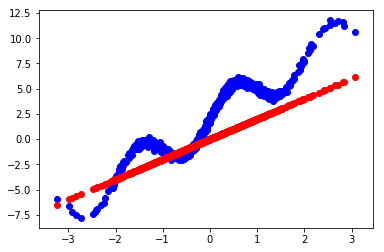

Current loss: 7.226541


In [41]:
import matplotlib.pyplot as plt
plt.scatter(inputs, outputs, c ='b')
plt.scatter(inputs, forward(inputs), c='r')

plt.show()

print('Current loss:', loss(forward(inputs), outputs).numpy())


In [0]:
def train(inputs, outputs , learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(forward(inputs), outputs)  
  dw, db = t.gradient(current_loss, [w, b])
  w.assign_sub(learning_rate * dw)
  b.assign_sub(learning_rate * db)
  

In [44]:
epochs = 

SyntaxError: ignored

In [0]:
from tensorflow.keras import layers


In [0]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1, )),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='mse', 
             metrics = ['mse'])

In [48]:
model.fit(x=inputs, y=outputs, batch_size=32, epochs =20, validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 1s 1ms/sample - loss: 12.8310 - mse: 12.8310 - val_loss: 11.8322 - val_mse: 11.8322
Epoch 2/20
900/900 [==============================] - 0s 116us/sample - loss: 8.2100 - mse: 8.2100 - val_loss: 5.9108 - val_mse: 5.9108
Epoch 3/20
900/900 [==============================] - 0s 111us/sample - loss: 3.1851 - mse: 3.1851 - val_loss: 1.6617 - val_mse: 1.6617
Epoch 4/20
900/900 [==============================] - 0s 111us/sample - loss: 1.4647 - mse: 1.4647 - val_loss: 1.4775 - val_mse: 1.4775
Epoch 5/20
900/900 [==============================] - 0s 114us/sample - loss: 1.3427 - mse: 1.3427 - val_loss: 1.3311 - val_mse: 1.3311
Epoch 6/20
900/900 [==============================] - 0s 129us/sample - loss: 1.2378 - mse: 1.2378 - val_loss: 1.2195 - val_mse: 1.2195
Epoch 7/20
900/900 [==============================] - 0s 116us/sample - loss: 1.1531 - mse: 1.1531 - val_loss: 1.1390 - val_mse: 1.1390


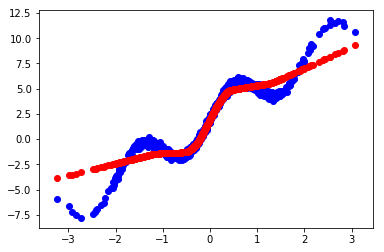

In [49]:
plt.scatter(inputs, outputs, c ='b')
plt.scatter(inputs, model(tf.expand_dims(inputs, 1))[:,0], c='r')
plt.show()


In [50]:
print('Current loss:', loss(model(tf.expand_dims(inputs, 1))[:,0], outputs).numpy())

Current loss: 0.7051502


In [51]:
!pip install tensorboardcolab

In [0]:
import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = \
  tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [57]:

# functional way of defining a model. Programming... output
input_x = layers.Input(shape=[1])
x = layers.Dense(64, activation='relu')(input_x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(1)(x)

model = tf.keras.Model(inputs= input_x, outputs =x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
             loss='mse',
             metrics =['mse'])

model.fit(inputs, outputs, batch_size=32, epochs=50, validation_split=0.1, 
          callbacks=[tensorboard_callback])

Train on 900 samples, validate on 100 samples
Epoch 1/50


W0509 14:22:13.169962 140329080280960 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.322239). Check your callbacks.


 32/900 [>.............................] - ETA: 11s - loss: 18.4450 - mse: 18.4450

W0509 14:22:13.195123 140329080280960 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.165443). Check your callbacks.


900/900 [==============================] - 1s 732us/sample - loss: 12.5842 - mse: 12.5842 - val_loss: 11.2520 - val_mse: 11.2520
Epoch 2/50
900/900 [==============================] - 0s 137us/sample - loss: 7.7524 - mse: 7.7524 - val_loss: 5.1857 - val_mse: 5.1857
Epoch 3/50
900/900 [==============================] - 0s 129us/sample - loss: 3.0653 - mse: 3.0653 - val_loss: 1.7453 - val_mse: 1.7453
Epoch 4/50
900/900 [==============================] - 0s 158us/sample - loss: 1.4901 - mse: 1.4901 - val_loss: 1.4497 - val_mse: 1.4497
Epoch 5/50
900/900 [==============================] - 0s 141us/sample - loss: 1.2883 - mse: 1.2883 - val_loss: 1.2573 - val_mse: 1.2573
Epoch 6/50
900/900 [==============================] - 0s 132us/sample - loss: 1.1678 - mse: 1.1678 - val_loss: 1.1632 - val_mse: 1.1632
Epoch 7/50
900/900 [==============================] - 0s 138us/sample - loss: 1.0931 - mse: 1.0931 - val_loss: 1.0443 - val_mse: 1.0443
Epoch 8/50
900/900 [==============================] - 0

In [0]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__(name='my_model')
    
    self.dense_1 = layers.Dense(64, activation='relu')
    self.dense_2 = layers.Dense(64, activation='relu')
    self.dense_3 = layers.Dense(1, activation='linear')
    

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((inputs, outputs))

In [60]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.float32, tf.float32)>

In [61]:
ds = tf.data.Dataset.from_tensor_slices((inputs, outputs))
for i,x in enumerate(ds): #you can easility iterate over a ds
  print(x)
  if i == 10: break

(<tf.Tensor: id=23630, shape=(), dtype=float32, numpy=-0.55200243>, <tf.Tensor: id=23631, shape=(), dtype=float32, numpy=-1.621956>)
(<tf.Tensor: id=23634, shape=(), dtype=float32, numpy=0.51616967>, <tf.Tensor: id=23635, shape=(), dtype=float32, numpy=5.4347878>)
(<tf.Tensor: id=23638, shape=(), dtype=float32, numpy=-0.07130348>, <tf.Tensor: id=23639, shape=(), dtype=float32, numpy=1.6859875>)
(<tf.Tensor: id=23642, shape=(), dtype=float32, numpy=-0.5720916>, <tf.Tensor: id=23643, shape=(), dtype=float32, numpy=-1.30486>)
(<tf.Tensor: id=23646, shape=(), dtype=float32, numpy=-0.9074209>, <tf.Tensor: id=23647, shape=(), dtype=float32, numpy=-1.0098708>)
(<tf.Tensor: id=23650, shape=(), dtype=float32, numpy=0.4225679>, <tf.Tensor: id=23651, shape=(), dtype=float32, numpy=5.1656737>)
(<tf.Tensor: id=23654, shape=(), dtype=float32, numpy=-1.2821244>, <tf.Tensor: id=23655, shape=(), dtype=float32, numpy=0.2312293>)
(<tf.Tensor: id=23658, shape=(), dtype=float32, numpy=-0.71714616>, <tf.Ten

In [0]:
ds =ds.shuffle(buffer_size=1000)

In [67]:
BATCH_SIZE= 32
ds = ds.repeat()  #repeat the dataset as many times as you need
ds = ds.batch(BATCH_SIZE) #create automatic batches
ds

<BatchDataset shapes: ((None,), (None,)), types: (tf.float32, tf.float32)>

In [65]:
# Downloading data
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True) #download the dataset of flowers
data_root = pathlib.Path(data_root_orig)

import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)  #store all paths and shuffle them

228818944/228813984 [==============================] - 3s 0us/step


In [0]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index,name in enumerate(label_names))
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] 
                    for path in all_image_paths] #get labels to classify them

def load_and_preprocess_image(path):  #load image using tensorflow function and preprocess it
  image = tf.io.read_file(path)
  return preprocess_image(image)

def preprocess_image(image):  #preprocess by decoding and resizing it
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [0]:

path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = path_ds.map(load_and_preprocess_image)

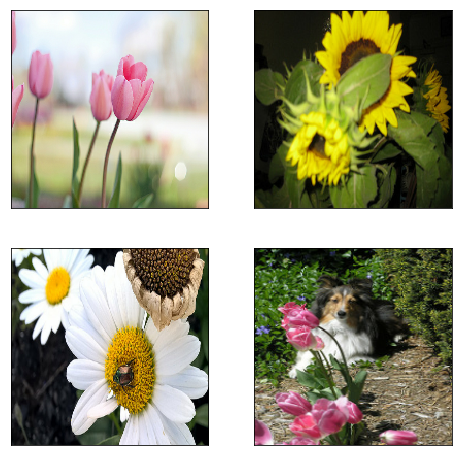

In [70]:
plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [0]:


ds = image_label_ds.shuffle(buffer_size=3000)
ds = ds.repeat(5)
ds = ds.batch(32)
ds = ds.prefetch(32)


In [0]:
from tensorflow.python.ops import control_flow_util
control_flow_util.ENABLE_CONTROL_FLOW_V2=True  # only limited to alpha release


In [0]:
def add(a, b):
  return a + b

In [76]:
add(tf.ones([2, 2]), tf.ones([2, 2]))  #  [[2., 2.], [2., 2.]]
add

<function __main__.add>

In [0]:
def linear_layer(x):
  return 2*x +1

@tf.function
def deep_net(x):
  return tf.nn.relu(linear_layer(x))

In [0]:
@tf.function  # decorator translates code into tensorflow optimized code.
def sum_even(items):
  s =0
  for c inm items:
    if c % 2 >0:
      continue
    s += c
  return s

In [87]:
import timeit

conv_layer = tf.keras.layers.Conv2D(100, 3)

@tf.function
def conv_fn(image):
  return conv_layer(image)

image= tf.zeros([1, 200, 200, 100])

# warm up

conv_layer(image); conv_fn(image)
print("Eager conv:", timeit.timeit(lambda: conv_layer(image), number=10))
print('Function conv:', timeit.timeit(lambda: conv_fn(image), number=10))

Eager conv: 0.004150324999500299
Function conv: 0.0038483089992951136


Defining Functions to prepare and load data.


In [0]:
def prepare_mnist_features_and_labels(x, y):
  x = tf.cast(x, tf.float32) /255.0
  y = tf.cast(y, tf.int64)
  return x, y

In [0]:
def mnist_dataset():
  (x,y), = tf.keras.datasets.mnist.load_data()
  ds = tf.data.Dataset.from_tensor_slices((x, y))
  ds = ds.map(prepare_mnist_features_and_labels)
  ds = ds.take(20000).shuffle(20000).batch(100)
  
  return ds

train_dataset = mnist_dataset

Defining model


In [0]:
model = tf.keras.Sequential([
    layers.Reshape(target_shape=(28*28,), input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10)
    
])

model.build()
optimizer = tf.keras.optimizers.Adam()


 Set loss and accuracy functions and define training model

In [0]:
compute_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
compute_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

def train_one_step():
  with tf.GradientTape() as tape:
    logtits =model(x)
    loss = compute_loss(y, logits)
    
    
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  
  computer_accuracy(y, logits) 
  return loss


In [0]:
def train(model, optimizer):
  train_ds = mnist_dataset()
  step = 0
  loss = 0
  accuracy = 0
  
  for x, y in train_ds:
    step+= l
    loss = train_one_step(model, optimizer, x, y)
    if tf.equal(step % 10, 0):
        tf.print('Step', step, ': loss', loss, '; accuracy',
                                                      compute_accuracy.result())
    return step, loss, accuracy

  step, loss, accuracy = train(model, optimizer)
  print('Final step', step, ': loss', loss, '; accuracy', compute_accuracy.result())